## Simulazione dell'esame di Metodi Numerici


In [73]:
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
from scipy.io import loadmat
import matplotlib.pyplot as plt
import SolveTriangular

## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







Matrice quadrata
Matrice simmetrica
Matrice positiva
(300, 300)
Matrice di grandi dimensioni
Matrice sparsa


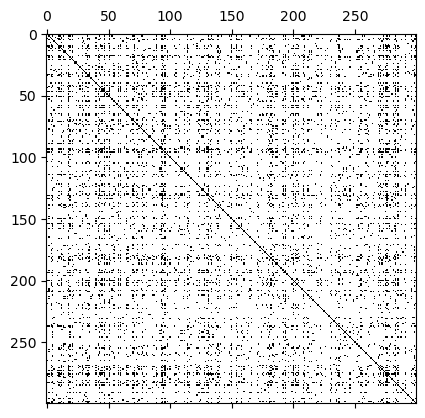

In [74]:
# carico la matrice
dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)

b=dati["b"]
b=b.astype(float)

# matrice quadrata
if A.shape[0] == A.shape[1]:
    print("Matrice quadrata")

# matrice simmetrica
if np.all(A.T == A):
    print("Matrice simmetrica")

# matrice positiva
if np.all(npl.eigvals(A) > 0):
    print("Matrice positiva")

# matrice di grandi dimensioni
print(A.shape)
if A.shape[0] >= 300:
    print("Matrice di grandi dimensioni")

# sparsa
elements = A.shape[0] * A.shape[1]
non_zeros = np.count_nonzero(A)
if non_zeros / elements <= 0.33:
    print("Matrice sparsa")

# visualizza matrice
plt.spy(A)

Dato che la matrice è simmetrica e definita positiva, risolvere il sistema Ax=b equivale a trovare il minimo della funzione quadratica F(x) = 1/2<Ax, x> - <b, x>

In [75]:
def steepestdescent(A, b, x0, itmax, tol):
	n,m=A.shape
	if n!=m:
		print("Matrice non quadrata")
		return [],[]
	
   	# inizializzare le variabili necessarie
	x = x0
	# calcolo residuo
	r = A@x-b
	# la prima direzione è -r
	p = -r
	it = 0
	
	# voglio che il valore calcolato Ax - b sia il più vicino possibile al valore esatto
	nb = np.linalg.norm(b, 2)
	errore = np.linalg.norm(r, 2) / nb
	
	vec_sol = [x]
	vet_r = [errore]
	 
	# utilizzare il metodo del gradiente per trovare la soluzione
	while it < itmax and errore >= tol:
		it += 1
		
		# ricalcolo alfa = <r, p> / <Ap, p>
		Ap = A @ p
		alpha = - (r.T @ p) / (p.T @ Ap)
	   
	   	# ricalcolo la solzione x = x + alfa * p   
		x = x + alpha * p
		vec_sol.append(x)
		
		# ricalcolo la direzione
		r = r + alpha * Ap
		p = -r
	
		errore=np.linalg.norm(r) / nb
		vet_r.append(errore)
	 
	return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
	n,m=A.shape
	if n!=m:
		print("Matrice non quadrata")
		return [],[]
	
	
	# inizializzare le variabili necessarie
	x = x0
	
	r = A@x-b
	p = -r
	it = 0
	
	nb=np.linalg.norm(b)
	errore=np.linalg.norm(r)/nb
	
	vec_sol=[x0]
	vet_r=[errore]
	
	# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
	while errore >= tol and it < itmax:
		it=it+1
		Ap= A @ p

		# alpha <r, p> / <Ap, p>
		alpha = -(r.T @ p) / (p.T @ Ap)
		x = x + alpha * p
		vec_sol.append(x)
		
		rtr_old = r.T @ r
		r = r + alpha * Ap
		gamma = (r.T @ r) / rtr_old 
		p = -r + gamma * p
		
		errore = np.linalg.norm(r) / nb
		vet_r.append(errore)
   
	
	return x,vet_r,vec_sol,it

Iterazioni steepest: 23203
Iterazioni conjugate: 328


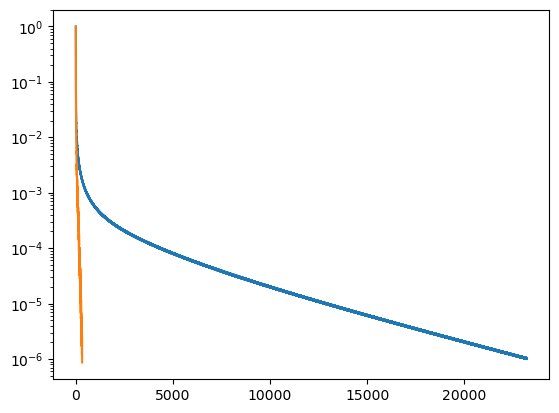

In [76]:
toll=1e-6
maxit=25000
x0 = np.zeros_like(b)

# metodo del gradiente
x_steep, err_steep, sol_steep, it_steep = steepestdescent(A, b, x0, maxit, toll)
# metodo del gradiente coniugato
x_conj, err_conj, sol_conj, it_conj = conjugate_gradient(A, b, x0, maxit, toll)

print("Iterazioni steepest:", it_steep)
print("Iterazioni conjugate:", it_conj)

plt.semilogy(np.arange(it_steep+1), err_steep, np.arange(it_conj+1), err_conj, '-')

In [77]:
# verifico condizionamento della matrice
print("Indice di condizionamento di A:", npl.cond(A, 2))

Indice di condizionamento di A: 9999.999999996371


Nel metoodo del gradiente l'errore è altamento condizionato dal condizionamento della matrice A:
err_k = ((K(A) - 1) / (K(A) + 1))^k * e_0

mentre per il metodo del gradiente coniugato l'errore è meno condizionato dal condizioanamento della matrice A:
err_k = ((sqrt(K(A)) - 1) / sqrt((K(A)) + 1))^k * e_0

per k grandi, il rapport K(A) - 1 / K(A) + 1 è circa 1 e quindi la convergenza è più lenta

Iterazioni steepest: 93
Iterazioni conjugate: 28


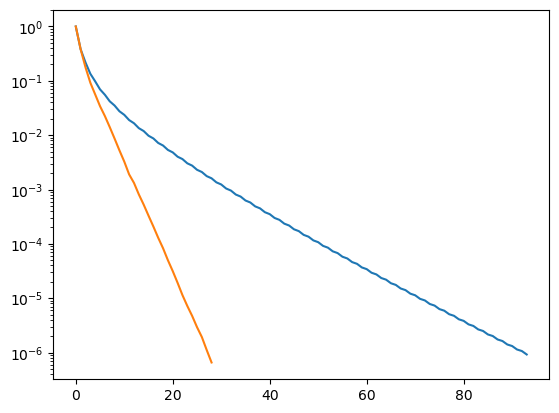

In [78]:
A1=A+np.eye(A.shape[0])*0.05
b1=np.sum(A, axis=1).reshape(A1.shape[0], 1)

toll=1e-6
maxit=25000
x0 = np.zeros_like(b)

# metodo del gradiente
x_steep, err_steep, sol_steep, it_steep = steepestdescent(A1, b1, x0, maxit, toll)
# metodo del gradiente coniugato
x_conj, err_conj, sol_conj, it_conj = conjugate_gradient(A1, b1, x0, maxit, toll)

print("Iterazioni steepest:", it_steep)
print("Iterazioni conjugate:", it_conj)

plt.semilogy(np.arange(it_steep+1), err_steep, np.arange(it_conj+1), err_conj, '-')

In [79]:
# verifico condizionamento della matrice
print("Indice di condizionamento di A1:", npl.cond(A1, 2))

Indice di condizionamento di A1: 20.95808383233533


Si nota come il condizionamento di A1 è molto più basso, il metodo del gradiente quindi converge con un numero di iterazioni molto più basso

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti $ (x_i,y_i) $, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

                                                                        Totale 14 punti

In [80]:
x = np.array([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
y = np.array([1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59])
y_cap = np.array([2*xi + 1 for xi in x])
xv = np.linspace(1, 3, 200)

In [81]:
# B^T @ B @ a = B^T y

def eqnorm(B: np.matrix, y):
    G = B.T @ B
    condG = npl.cond(G)
    print("Condizionamento di G", condG)
    
    f = B.T @ y

    # dato che simmetrica e definita positiva: uso cholesky
    L = spl.cholesky(G, lower=True)
    b, flag = SolveTriangular.Lsolve(L, f)

    if flag == 0:
        a, flag = SolveTriangular.Usolve(L.T, b)
        return a
    
    return None

[[1.  1. ]
 [1.  1.2]
 [1.  1.4]
 [1.  1.6]
 [1.  1.8]
 [1.  2. ]
 [1.  2.2]
 [1.  2.4]
 [1.  2.6]
 [1.  2.8]
 [1.  3. ]]
Condizionamento di G 70.88589282069796


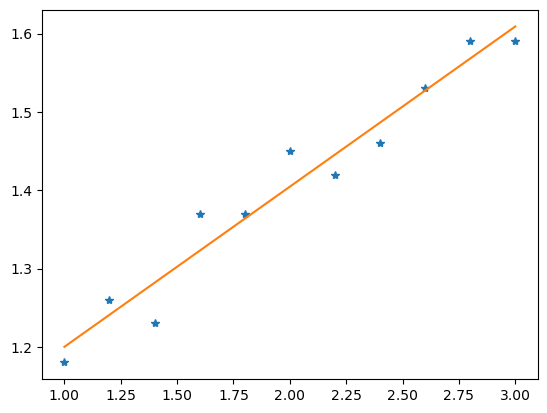

In [82]:
n = 1 #grado del polinomio di approssimazione
n1 = n + 1 #gradi di libertà o numero dei coefficenti di un polinomio
m = x.shape
B = np.vander(x, increasing=True)[:, :n1] #prendo le prime n1 colonne: definiscono il grado del polinomio

print(B)

# calcolo i coefficenti del polinomio di approssimazione
a_EQN = eqnorm(B, y)
# inverto i coefficenti del polinomio: p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]
# e valuto i punti nel polinomio di approssimazione
pol_EQN = np.polyval(np.flip(a_EQN), xv) 

plt.plot(x, y, '*', xv, pol_EQN)
plt.show()

In [83]:
def plagr(xnodi,j):
   """
   Restituisce i coefficienti del j-esimo pol di
   Lagrange associato ai punti del vettore xnodi
   """
   xzeri = np.zeros_like(xnodi)
   n = xnodi.size
   if j==0:
      xzeri = xnodi[1:n]
   else:
      xzeri = np.append(xnodi[:j], xnodi[j+1:])

   num = np.poly(xzeri) 
   den = np.polyval(num, xnodi[j])

   p=num/den

   return p


def InterpL(x, y, xx):
   """"
   %funzione che determina in un insieme di punti il valore del polinomio
   %interpolante ottenuto dalla formula di Lagrange.
   % DATI INPUT
   %  x  vettore con i nodi dell'interpolazione
   %  f  vettore con i valori dei nodi 
   %  xx vettore con i punti in cui si vuole calcolare il polinomio
   % DATI OUTPUT
   %  y vettore contenente i valori assunti dal polinomio interpolante
   %
   """
   n=x.size
   m=xx.size
   L=np.zeros((m,n))
   for j in range(n):
      p=plagr(x,j)
      L[:,j]=np.polyval(p,xx)
   
   
   return L@y

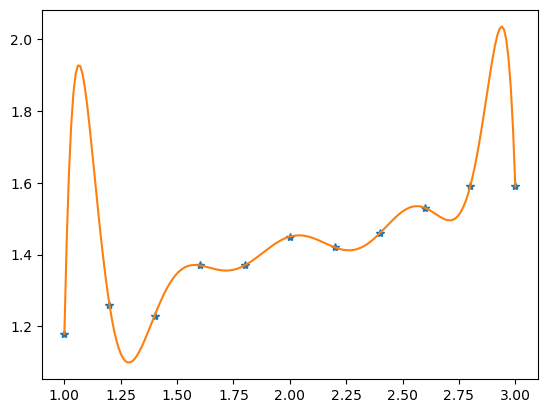

In [91]:
# calcolo i coefficenti del polinomio di interpolazione
Y = InterpL(x, y, xv)

plt.plot(x, y, '*', xv, Y)
plt.show()

Condizionamento di G 70.88589282069796


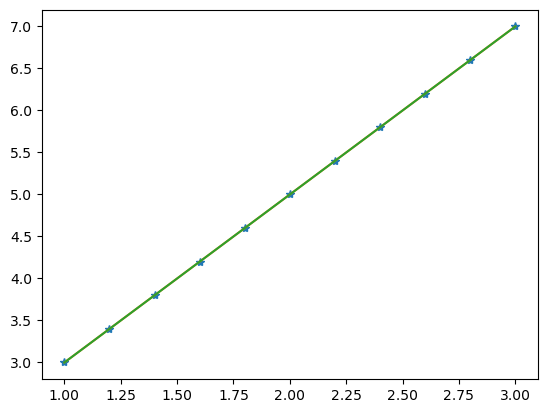

In [94]:
n = 1
n1 = n + 1
m = x.shape

B = np.vander(x, increasing=True)[:, :n1]
a_EQN = eqnorm(B, y_cap)
pol_EQN = np.polyval(np.flip(a_EQN), xv) 

Y = InterpL(x, y_cap, xv)

plt.plot(x, y_cap, '*', xv, pol_EQN, xv, Y)
plt.show()

Le due rette approssimazioni corrispondo esattamente con la retta delle soluzioni, questo perchè nella formula dell'errore è presente la moltiplicazione della derivata n+1-esima della funzione f(xi) = 2*xi + 1, che essendo lineare ha derivata n+1-esima nulla

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]
